## 1. Importo las librerias y lectura del dataset

In [86]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

df = pd.read_csv('HR.Employee.Attrition.csv', sep=',')
print(df.shape)
df.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Obtengo los tipos de variables

In [87]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

## 3. Verifico la presencia de NAs

In [88]:
df.isna().any().any()

False

## 4. Separo features y target

In [89]:
target = df['Attrition']
df.drop(columns=['Attrition'], axis=1, inplace=True)

## 5. Elimino las columnas con valores diferentes en todas las filas

In [90]:
unique_count = df.nunique()
unique_count[unique_count == len(df)]

EmployeeNumber    1470
dtype: int64

In [91]:
df.drop(columns=['EmployeeNumber'], axis=1, inplace=True)

## 6. Elimino las columnas con valor igual en todas las filas

In [92]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)        

EmployeeCount
Over18
StandardHours


In [93]:
df.drop(columns=['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)

## 7. Convierto las variables alfanumericas en numericas

In [94]:
col_types = df.dtypes
col_types[col_types == 'object']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [95]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['OverTime'] = df['OverTime'].map({'No': 0,'Yes':1})
target = target.map({'No': 0,'Yes':1})

## 8. Aplico el One Hot Encoding en las variables categoricas

In [96]:
col_types = df.dtypes
df = pd.get_dummies(df, columns=col_types[col_types == 'object'].index.values, drop_first=True)

In [97]:
col_types = df.dtypes
col_types[col_types == 'object']

Series([], dtype: object)

## 9. Normalizacion de las variables

In [98]:
min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## 10. Ejecuto el PCA para 2 componentes

In [99]:
pca = PCA(n_components=2)
output_pca = pca.fit_transform(X_norm)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.13965169 0.09019223]
[30.60441223 24.59492492]


## 11. Grafico del resultado obtenido en 2D

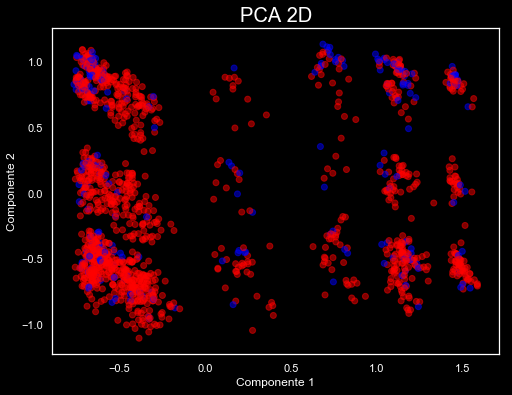

In [100]:
df_pca = pd.DataFrame(output_pca, columns=["comp1","comp2"])
colors = ['red' if l == 0.0 else 'blue' for l in target]
plt.style.use('dark_background')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.grid(False)
ax.set_title('PCA 2D', fontsize=20)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.scatter(df_pca.comp1, df_pca.comp2, color=colors, alpha=0.5)
fig.savefig('pca_2D.png')

## 12. Ejecuto el PCA para 3 componentes

In [101]:
pca = PCA(n_components=3)
output_pca = pca.fit_transform(X_norm)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.13965169 0.09019223 0.07925844]
[30.60441223 24.59492498 23.05598625]


## 13. Grafico del resultado obtenido en 3D

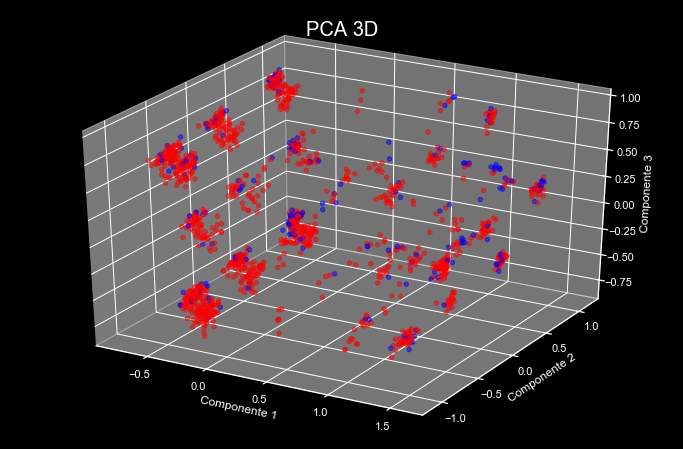

In [102]:
df_pca = pd.DataFrame(output_pca,columns=["comp1","comp2","comp3"])
colors = ['red' if l == 0.0 else 'blue' for l in target]
plt.style.use('dark_background')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca.comp1, df_pca.comp2, df_pca.comp3, color=colors, alpha=0.5)
ax.set_title('PCA 3D', fontsize=20)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
fig.savefig('pca_3D.png')
plt.show()

## 14. Calculo la varianza acumulada hasta el maximo valor de k posible

In [103]:
pca = PCA()
pca.fit(X_norm)
cum_var = np.cumsum(pca.explained_variance_ratio_)

## 15. Grafico la varianza acumulada para determinar el valor optimo de k

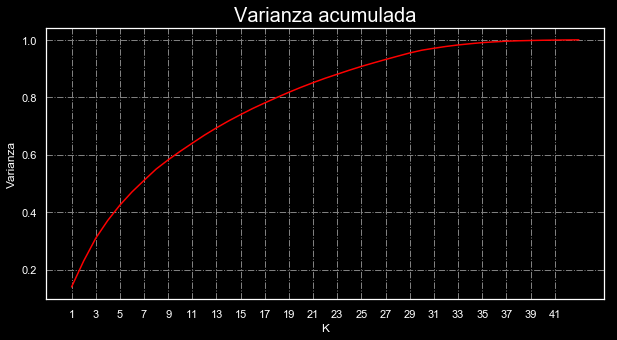

In [104]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(np.arange(1, pca.n_components_+1), cum_var, color='red')
plt.xticks(ticks=np.arange(1, df.shape[1], 2))
ax.grid(True, color='gray', linestyle='-.') 
ax.set_title('Varianza acumulada', fontsize=20)
ax.set_xlabel('K')
ax.set_ylabel('Varianza')
fig.savefig('pca_Varianza.png')

## 16. Busco la k optima para regresion logistica

In [105]:
accuracy = []
for k in np.arange(1, df.shape[1]):
    pca = PCA(n_components=k)
    X = pca.fit_transform(X_norm)
    model = LogisticRegression(solver='liblinear')
    scores = cross_val_score(model, X, target, cv=5, scoring='accuracy')
    accuracy.append(scores.mean())

## 17. Grafico la accuracy obtenida por cada valor de k

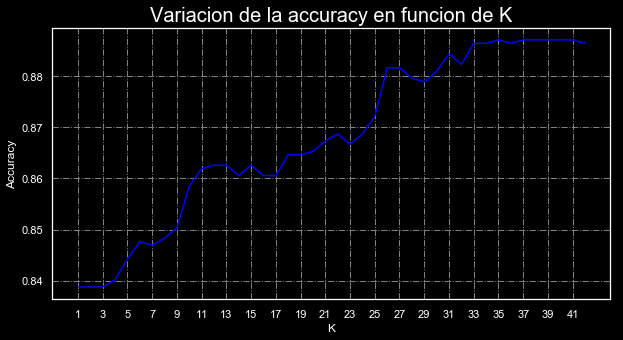

In [106]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(np.arange(1, df.shape[1]), accuracy, color='blue')
plt.xticks(ticks=np.arange(1, df.shape[1], 2))
ax.grid(True, color='gray', linestyle='-.') 
ax.set_title('Variacion de la accuracy en funcion de K', fontsize=20)
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
fig.savefig('pca_Accuracy.png')